In [32]:
import pandas as pd

In [33]:
#To import the Data Set
data = pd.read_csv("C:\\Users\\A\\Desktop\\train_python.csv",delimiter=",")

In [34]:
#Method1(Using Standard technique to replace numerical missing values)

In [35]:
non_categorical_features = data.select_dtypes(exclude='object')
categorical_features = data.select_dtypes(include='object')

In [36]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
non_categorical_features= imputer.fit_transform(non_categorical_features)

C:\Users\A\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [37]:
non_categorical_features = pd.DataFrame(non_categorical_features)

In [38]:
non_categorical_features.head(20)

,0,1,2,3,4
0,5849.0,0.0,146.412162,360.0,1.000000
1,4583.0,1508.0,128.000000,360.0,1.000000
2,3000.0,0.0,66.000000,360.0,1.000000
3,2583.0,2358.0,120.000000,360.0,1.000000
4,6000.0,0.0,141.000000,360.0,1.000000
5,5417.0,4196.0,267.000000,360.0,1.000000
6,2333.0,1516.0,95.000000,360.0,1.000000
7,3036.0,2504.0,158.000000,360.0,0.000000
8,4006.0,1526.0,168.000000,360.0,1.000000
9,12841.0,10968.0,349.000000,360.0,1.000000


In [ ]:
#Method 2(Using clustering tchnique to replace numerical missing values)

In [ ]:
non_categorical_features = data.select_dtypes(exclude='object')
categorical_features = data.select_dtypes(include='object')

In [ ]:
from missingpy import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
non_categorical_features= imputer.fit_transform(non_categorical_features)

In [ ]:
non_categorical_features = pd.DataFrame(non_categorical_features)

In [ ]:
non_categorical_features.head(20)

In [ ]:
non_categorical_features.shape

In [ ]:
categorical_features.shape

In [ ]:
categorical_features.isnull().sum()

In [7]:
print(sum(categorical_features.isnull().sum()))
print(sum(non_categorical_features.isnull().sum()))

63
0


In [8]:
categorical_features.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [13]:
import numpy as np

In [39]:
for i in categorical_features:
    categorical_features[i]=categorical_features[i].replace(np.nan,"Not Provided",regex=True)

C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
categorical_features.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [18]:
#Combing Categorical and Non-catgorical Data Frames

In [41]:
combined_data = pd.concat([categorical_features,non_categorical_features],axis=1)

In [42]:
sum(combined_data.isnull().sum())

0

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(5, 5)

In [54]:
%matplotlib inline

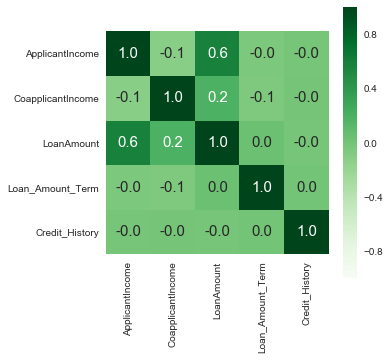

In [56]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(5,5))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
#Filtering the data

In [57]:
subset_data = data[(data.Gender == 'Male') & (data.Married == 'Yes')]